### This script contains the whole analysis flow of the Markov State Model analysis, which contains TICA, MSM, and HMM.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyemma
import mdtraj as md
import pyemma.coordinates as coor

%pylab inline
%config InlineBackend.figure_format='svg'

Populating the interactive namespace from numpy and matplotlib


/Users/wangfeiyang/miniconda2/lib/python2.7/site-packages/pyemma/__init__.py:130: UserWarning: You are not using the latest release of PyEMMA. Latest is 2.5.6, you have 2.5.4.
  .format(latest=latest, current=current), category=UserWarning)
/Users/wangfeiyang/miniconda2/lib/python2.7/site-packages/pyemma/__init__.py:134: UserWarning: Python 2.7 usage is deprecated. Future versions of PyEMMA will not support it. Please upgrade your Python installation.
  "Please upgrade your Python installation.", category=UserWarning)


# TICA

In [2]:
# Load TICA coordinates
data = np.load('./TICA/2F4K_TICA_coordinates_lag100.npz')
print data.keys()

coordinate = data['Y']
print(coordinate.shape)
print(coordinate[0].shape)

traj = np.array(coordinate)[0][:,0:10]
print(traj.shape)

['Y']
(1, 627907, 50)
(627907, 50)
(627907, 10)


Text(0,0.5,'TICA coordinate #2')

<Figure size 576x432 with 0 Axes>

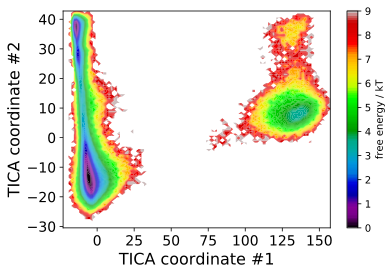

In [3]:
# Plot free energy as a function of the first to TICA coordinates
fig = figure(figsize=(8,6))

pyemma.plots.plot_free_energy(coordinate[0][:,0], coordinate[0][:,1])

xticks(fontsize=14)
yticks(fontsize=14)

xlabel('TICA coordinate #1', fontsize=16)
ylabel('TICA coordinate #2', fontsize=16)

# MSM

In [4]:
# Load the discrete trajectory (obtained with k-means clustering)
data = np.load('./MSM/2F4K_MSM_10TICA_clusters_1000.npz')
print(list(data.keys()))

n_clusters = data['n_clusters']
dtraj = data['micro_membership']
centers = data['centers']

['centers', 'n_clusters', 'micro_membership']


<Figure size 576x432 with 0 Axes>

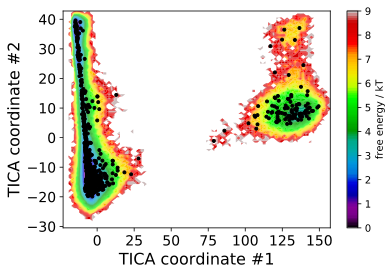

In [5]:
# Plot centers of clustering result onto free energy map
fig = figure(figsize=(8,6))

pyemma.plots.plot_free_energy(traj[:,0], traj[:,1])

xticks(fontsize=14)
yticks(fontsize=14)

xlabel('TICA coordinate #1', fontsize=16)
ylabel('TICA coordinate #2', fontsize=16)

plt.plot(centers[:,0], centers[:,1], '.', color='black')

# HMM

In [6]:
# Construct HMM, with the lag time chosen from the convergence of MSM implied timescales.
# The number of Hidden states can be infered from both the free energy map and the timscales.
hidden_states = 3
lag_hmm = 50
hmm = pyemma.msm.estimate_hidden_markov_model(list(dtraj), hidden_states, lag=lag_hmm)

In [7]:
# Assign discrete states into different hidden states
cores = []
for i in range(hidden_states):
    cores.append(np.where(hmm.metastable_memberships[:, i] > 0.95)[0])
    
print('Microstate composition of each macrostate...')

print('\n')
for i in range(hidden_states):
    print('macrostate ' + str(i) + ' = ' + str(cores[i]))
    
print ('Number of missing microstates is ' + str(1000-(len(cores[0])+len(cores[1])+len(cores[2]))))

Microstate composition of each macrostate...


macrostate 0 = [  2   9  17  32  36  45  46  52  59  78  83 108 110 118 119 131 153 154
 159 166 174 178 181 183 199 204 235 238 257 265 278 281 297 307 312 318
 319 325 363 369 380 386 399 414 422 429 433 438 460 461 468 474 475 490
 493 494 505 516 517 519 532 537 539 544 545 557 566 567 585 605 643 644
 650 667 669 671 672 686 698 701 702 703 706 717 748 749 807 814 847 851
 858 869 879 890 898 917 921 925 926 929 939 941 958 959 988]
macrostate 1 = [  1   3   4   6   7   8  11  13  14  15  16  18  19  20  21  22  23  24
  25  26  30  31  33  34  37  38  39  40  41  42  43  44  47  48  50  51
  54  56  57  60  61  63  64  65  66  68  69  70  71  74  76  79  80  81
  82  84  85  88  89  91  92  94  95  96  97  98  99 100 102 103 104 106
 107 109 111 112 113 114 115 116 117 120 121 123 124 125 127 128 129 130
 132 133 134 135 136 137 139 140 141 143 144 145 146 149 150 151 152 155
 156 160 161 162 163 164 165 167 169 170 171 172 175 177 1

<Figure size 576x432 with 0 Axes>

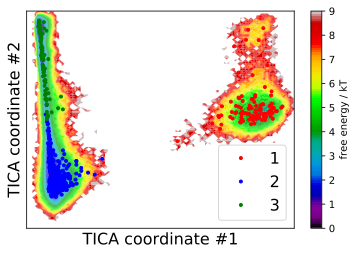

In [9]:
# Plot the hidden states on free energy map for validation
fig = figure(figsize=(8,6))

# plot free energy map 
pyemma.plots.plot_free_energy(traj[:,0], traj[:,1])

xticks(fontsize=14)
yticks(fontsize=14)

xlabel('TICA coordinate #1', fontsize=16)
ylabel('TICA coordinate #2', fontsize=16)

# plot discrete states
colors = ['red', 'blue', 'green', 'violet']
labels = ['1', '2', '3', '4']


# plot hidden states as defined above
for i in range(hidden_states):
    plt.plot(centers[cores[i],0], centers[cores[i],1], '.', color = colors[i], label= labels[i], )

xticks([], fontsize=14)
yticks([], fontsize=14)

plt.legend(loc=4, fontsize=16)

### Thus, these 3 hidden states are the metastable states for Villin